# Student Scores: EDA

# Load required Python packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/tiffanyflor/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


**Locate and print current working directory and parent directory.**

In [2]:
path = os.getcwd()
parent = os.path.dirname(path)
print(path)
print(parent)

/Users/tiffanyflor/Dropbox/MyProjects/Student Scores/notebooks
/Users/tiffanyflor/Dropbox/MyProjects/Student Scores


**Print contents of data/interim.**

In [3]:
os.listdir(parent+'/data/interim')

['total_student_scores_without_dummies.csv',
 'cleaned_student_scores.csv',
 'student_scores_no_outliers.csv',
 'total_student_scores_dummies.csv',
 '.ipynb_checkpoints']

# Load cleaned student scores into DataFrame

In [4]:
df = pd.read_csv(parent+'/data/interim/cleaned_student_scores.csv',index_col=0)

**Create Total Score Feature**

In [5]:
df['mean score'] = round((df['math score'] + df['reading score'] + df['writing score'])/3,1)

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,0,72,72,74,72.7
1,female,group C,some college,standard,1,69,90,88,82.3
2,female,group B,master's degree,standard,0,90,95,93,92.7
3,male,group A,associate's degree,free/reduced,0,47,57,44,49.3
4,male,group C,some college,standard,0,76,78,75,76.3


In [7]:
df.shape

(10000, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       10000 non-null  object 
 1   race/ethnicity               10000 non-null  object 
 2   parental level of education  10000 non-null  object 
 3   lunch                        10000 non-null  object 
 4   test preparation course      10000 non-null  int64  
 5   math score                   10000 non-null  int64  
 6   reading score                10000 non-null  int64  
 7   writing score                10000 non-null  int64  
 8   mean score                   10000 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 781.2+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
test preparation course,10000.0,0.34290,0.474702,0.0,0.0,0.0,1.0,1.0
math score,10000.0,66.79450,15.195867,0.0,56.0,67.0,78.0,100.0
reading score,10000.0,69.65510,14.641905,15.0,60.0,70.0,80.0,100.0
writing score,10000.0,68.44230,15.360601,7.0,58.0,69.0,79.0,100.0
mean score,10000.0,68.29725,14.353959,9.0,58.7,68.3,78.7,100.0


In [10]:
df.describe(include=[np.object, pd.Categorical]).T

,count,unique,top,freq
gender,10000,2,male,5040
race/ethnicity,10000,5,group C,3145
parental level of education,10000,6,some college,2326
lunch,10000,2,standard,6496


## Convert object datatypes to categorical

In [11]:
obj_cols = ['gender','race/ethnicity','lunch']
df = df.astype({'gender':'category', 'race/ethnicity':'category','parental level of education':'category','lunch':'category'})

In [12]:
df.dtypes

gender                         category
race/ethnicity                 category
parental level of education    category
lunch                          category
test preparation course           int64
math score                        int64
reading score                     int64
writing score                     int64
mean score                      float64
dtype: object

# Build data profile tables and plots

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
test preparation course,10000.0,0.34290,0.474702,0.0,0.0,0.0,1.0,1.0
math score,10000.0,66.79450,15.195867,0.0,56.0,67.0,78.0,100.0
reading score,10000.0,69.65510,14.641905,15.0,60.0,70.0,80.0,100.0
writing score,10000.0,68.44230,15.360601,7.0,58.0,69.0,79.0,100.0
mean score,10000.0,68.29725,14.353959,9.0,58.7,68.3,78.7,100.0


In [14]:
df.describe(include=['category']).T

,count,unique,top,freq
gender,10000,2,male,5040
race/ethnicity,10000,5,group C,3145
parental level of education,10000,6,some college,2326
lunch,10000,2,standard,6496


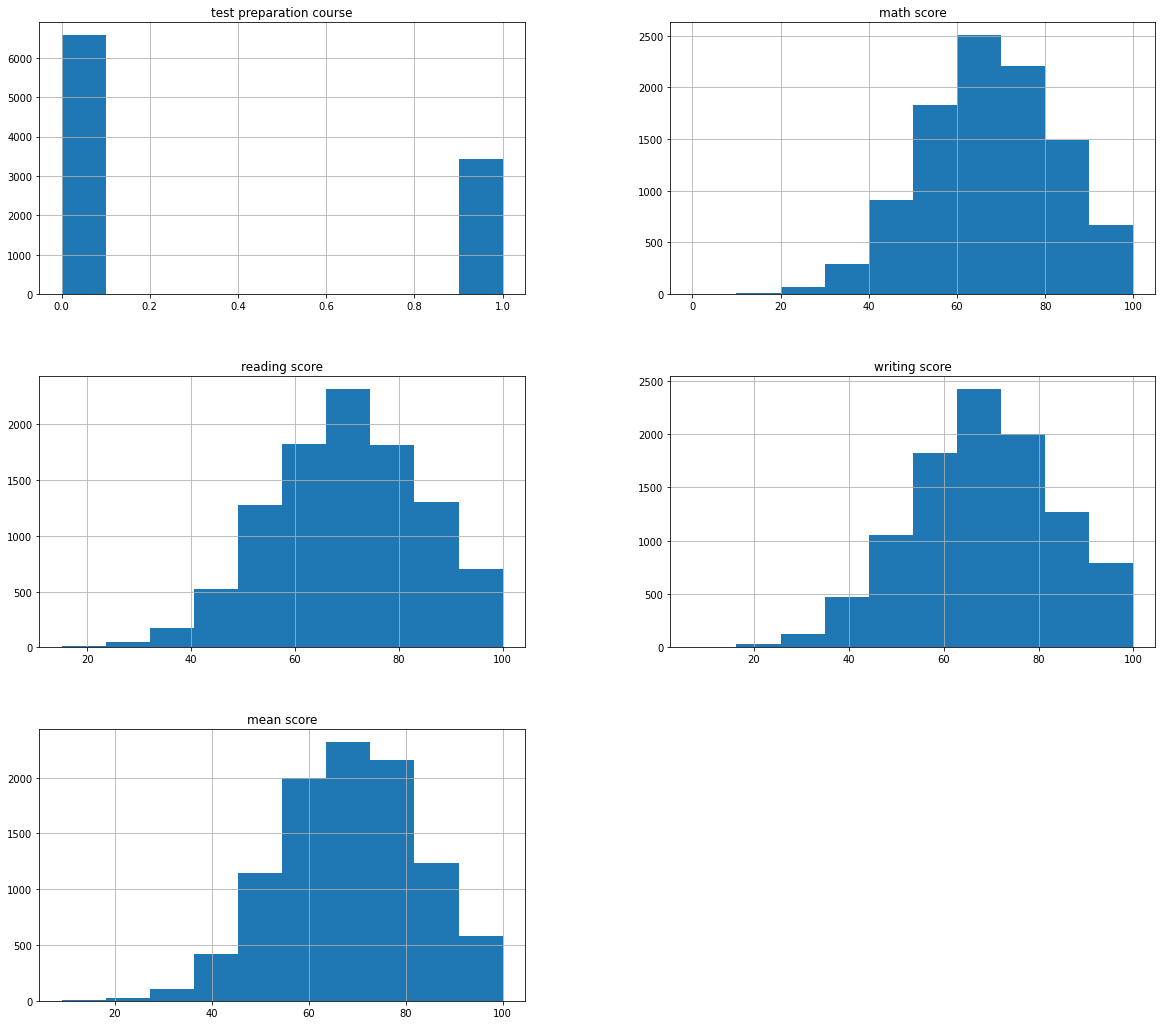

In [15]:
hist = df.hist(figsize=(20,18))

The math, reading, and writing score are used to calculated the mean score. All columns were left in for observational purposes.

The test scores all seem to have a close to normal distribution. This will be further examined.

# Anamolies & Outliers

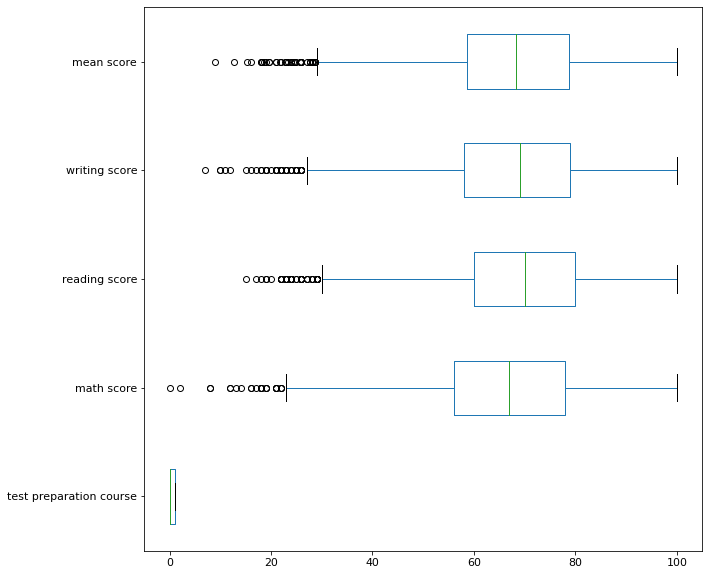

In [16]:
boxplot = df.boxplot(grid=False, vert=False, fontsize=11, figsize=(10,10))

At this time, we will not remove outliers since we are searching for a solution for all students, not just the students performing within the norm.

Depending on prediction accuracy, we may revisit this step and try removing the outliers. Because of this, we will create a dataframe without outliers to save for later.

In [17]:
from scipy import stats
import numpy as np

#df_numeric = df[['reading score','writing score','math score']]

df_numeric = df[['mean score']]

# create array with z-scores
z = np.abs(stats.zscore(df_numeric))

# new dataframe without outliers
df_numeric_out = df_numeric[(z < 3).all(axis=1)]

In [18]:
df_numeric_out.shape

(9973, 1)

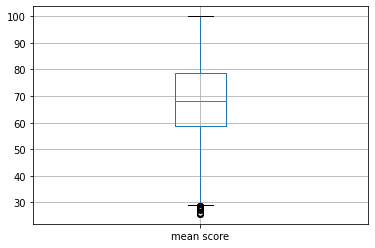

In [19]:
df_numeric_out.boxplot()

In [20]:
df_numeric[(z > 2.7).all(axis=1)]

,mean score
17,26.0
59,9.0
76,26.0
327,23.3
596,23.0
601,29.3
980,18.3
181,24.7
420,19.0
684,28.7


In [21]:
score_list=df_numeric[(z > 3).all(axis=1)].index

In [22]:
for score in score_list:
    print(df.iloc[score])

gender                                   female
race/ethnicity                          group C
parental level of education    some high school
lunch                              free/reduced
test preparation course                       0
math score                                    0
reading score                                17
writing score                                10
mean score                                    9
Name: 59, dtype: object
gender                                 male
race/ethnicity                      group A
parental level of education    some college
lunch                          free/reduced
test preparation course                   0
math score                               28
reading score                            23
writing score                            19
mean score                             23.3
Name: 327, dtype: object
gender                                 male
race/ethnicity                      group B
parental level of education     hig

In [23]:
# Merge dataframes to ensure remaining data is retained
df_NO = df_numeric_out.merge(df[['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course','math score','reading score','writing score']], how='left', left_index=True, right_index=True)
df_NO = df_NO[['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course','math score','reading score','writing score', 'mean score']]
df_NO.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,0,72,72,74,72.7
0,female,group B,high school,standard,1,75,85,91,72.7
0,male,group C,some college,free/reduced,0,52,57,54,72.7
0,male,group B,some high school,standard,1,61,57,62,72.7
0,female,group C,some college,standard,1,80,86,91,72.7


In [24]:
df_NO.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'mean score'],
      dtype='object')

In [25]:
df_NO.shape

(99730, 9)

In [26]:
df_NO.to_csv('../data/interim/student_scores_no_outliers.csv')

**To predict students who may benefit from additional support, we will focus on 'total score' as our dependent variable.**

mean: 68.29725
median: 68.3
standard deviation: 14.353959211729885
variance: 206.0361450520052


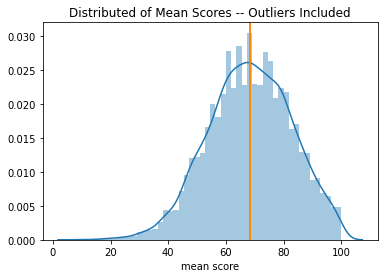

In [27]:
# Examine distribution of mean score with outliers

#hist = df['mean score'].hist()
sns.distplot(df['mean score'])
plt.title('Distributed of Mean Scores -- Outliers Included')
plt.axvline(x=df['mean score'].mean(), color='red')
plt.axvline(x=df['mean score'].median(), color='orange')

print('mean: {}'.format(df['mean score'].mean()))
print('median: {}'.format(df['mean score'].median()))
print('standard deviation: {}'.format(df['mean score'].std()))
import statistics
print('variance: {}'.format(statistics.variance(df['mean score'])))

mean: 68.42621076907652
median: 68.3
standard deviation: 14.155337199393227
variance: 200.37357122852563


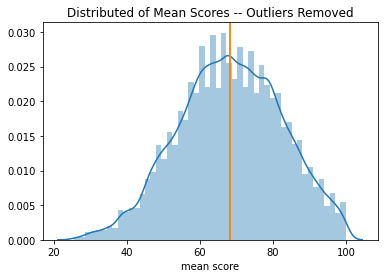

In [28]:
# Examine distribution of mean score with outliers REMOVED

#hist = df_NO['mean score'].hist()
sns.distplot(df_NO['mean score'])
plt.title('Distributed of Mean Scores -- Outliers Removed')
plt.axvline(x=df_NO['mean score'].mean(), color='red')
plt.axvline(x=df_NO['mean score'].median(), color='orange')

print('mean: {}'.format(df_NO['mean score'].mean()))
print('median: {}'.format(df_NO['mean score'].median()))
print('standard deviation: {}'.format(df_NO['mean score'].std()))
import statistics
print('variance: {}'.format(statistics.variance(df_NO['mean score'])))

# Explore data relationships

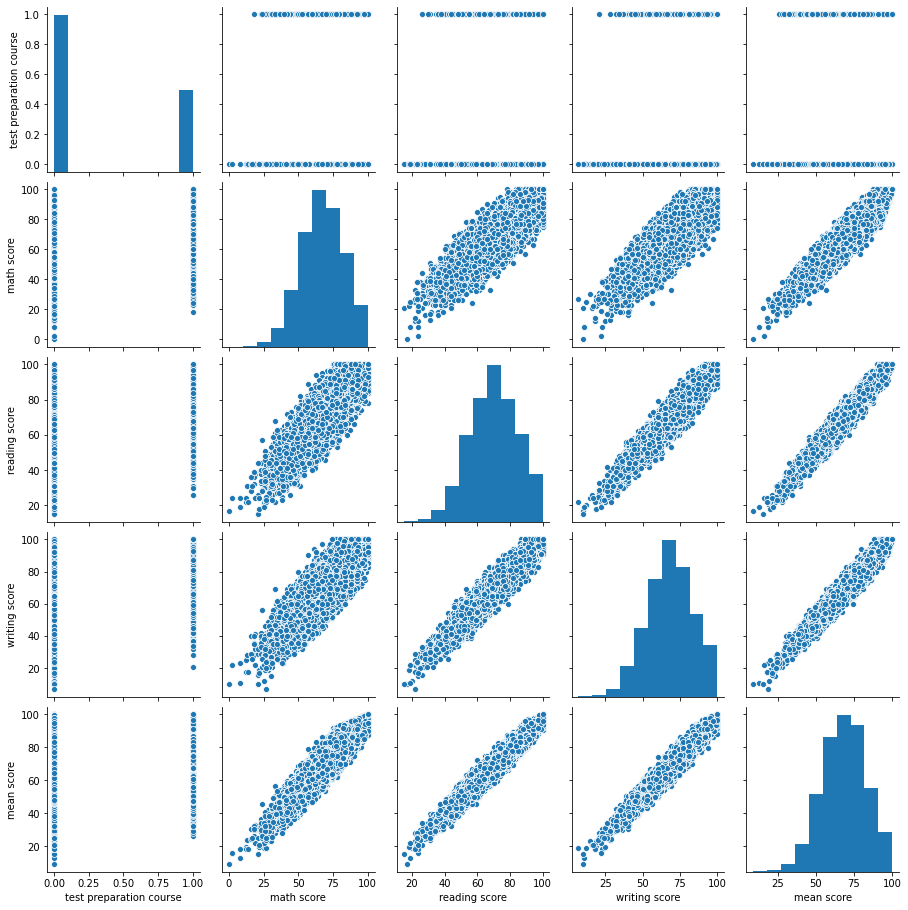

In [29]:
g = sns.pairplot(df)

In [30]:
def education(x):
    if x == 'some high school':
        return 0
    elif x == 'high school':
        return 0
    #elif x == 'some college':
    #    return 1
    else:
        return 1
    
df['education'] = df['parental level of education'].apply(education)

In [31]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score,education
0,female,group B,bachelor's degree,standard,0,72,72,74,72.7,1
1,female,group C,some college,standard,1,69,90,88,82.3,1
2,female,group B,master's degree,standard,0,90,95,93,92.7,1
3,male,group A,associate's degree,free/reduced,0,47,57,44,49.3,1
4,male,group C,some college,standard,0,76,78,75,76.3,1
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,some college,standard,1,77,86,87,83.3,1
996,female,group D,some college,free/reduced,0,41,50,53,48.0,1
997,male,group A,associate's degree,free/reduced,1,77,84,81,80.7,1
998,female,group D,associate's degree,free/reduced,1,60,68,75,67.7,1


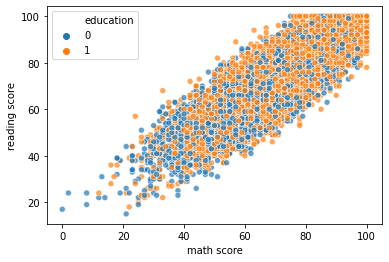

In [32]:
sns.scatterplot(x='math score',y='reading score',data=df,hue='education',alpha=0.7)

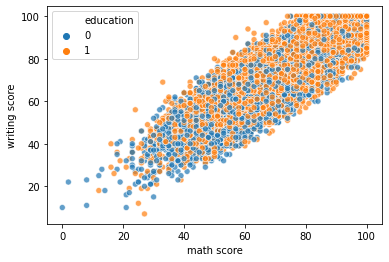

In [33]:
sns.scatterplot(x='math score',y='writing score',data=df,hue='education',alpha=0.7)

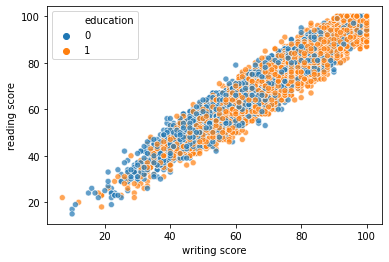

In [34]:
sns.scatterplot(x='writing score',y='reading score',data=df,hue='education',alpha=0.7)

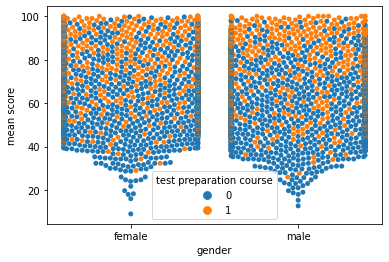

In [35]:
sns.swarmplot(x='gender',y='mean score',data=df,hue='test preparation course')

female mean: 70.24635080645162
female median: 70.7
female standard deviation: 14.240188026184637
female variance: 202.7829550210923

male mean: 66.37908730158729
male median: 66.3
male standard deviation: 14.207711373512199
male variance: 201.85906247302785

P-value: 1.0250514450539338e-41
The p-value is less than the 5% confidence interval.
This means we can reject the null hypothesis stating that the two sample means are equal.


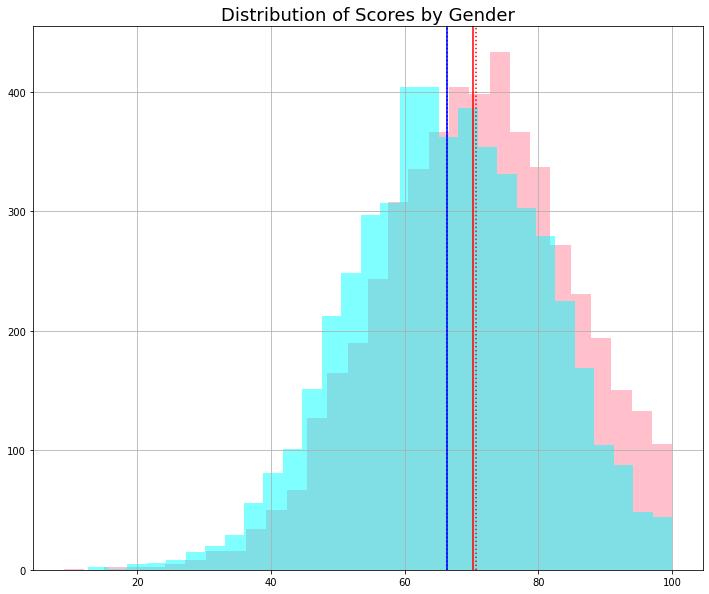

In [36]:
# Compare genders
female = df[df['gender'] == 'female']             
male = df[df['gender'] == 'male']


plt.figure(figsize=(12,10))
hist = female['mean score'].hist(bins=30, color='pink')
hist = male['mean score'].hist(bins=30, color='cyan',alpha=0.5)

plt.title('Distribution of Scores by Gender', fontsize=18)
plt.axvline(x=female['mean score'].mean(), color='red')
plt.axvline(x=female['mean score'].median(), linestyle='dotted',color='red')
plt.axvline(x=male['mean score'].mean(), color='blue')
plt.axvline(x=male['mean score'].median(), linestyle='dotted',color='blue')


print('female mean: {}'.format(female['mean score'].mean()))
print('female median: {}'.format(female['mean score'].median()))
print('female standard deviation: {}'.format(female['mean score'].std()))
print('female variance: {}\n'.format(statistics.variance(female['mean score'])))

print('male mean: {}'.format(male['mean score'].mean()))
print('male median: {}'.format(male['mean score'].median()))
print('male standard deviation: {}'.format(male['mean score'].std()))
print('male variance: {}'.format(statistics.variance(male['mean score'])))

# Two-Sample T-Test
# 5% confidence interval
# Such a test tells us whether two data samples have different means.
# Here, we take the null hypothesis that both groups have equal means.
# We don’t need a known population parameter for this.

results = stats.ttest_ind(a=male['mean score'],b=female['mean score'],equal_var=False)
print('\nP-value: {}'.format(results[1]))
print('The p-value is less than the 5% confidence interval.')
print('This means we can reject the null hypothesis stating that the two sample means are equal.')

test prep mean: 73.3058034412365
test prep median: 73.7
test prep standard deviation: 13.61503534444298
test prep variance: 185.36918743043157

no test prep mean: 65.68359458225537
no test prep median: 66.0
no test prep standard deviation: 14.033030786096287
no test prep variance: 196.9259530435262

P-value: 1.5746958485480335e-145
The p-value is less than the 5% confidence interval.
This means we can reject the null hypothesis stating that the two sample means are equal.


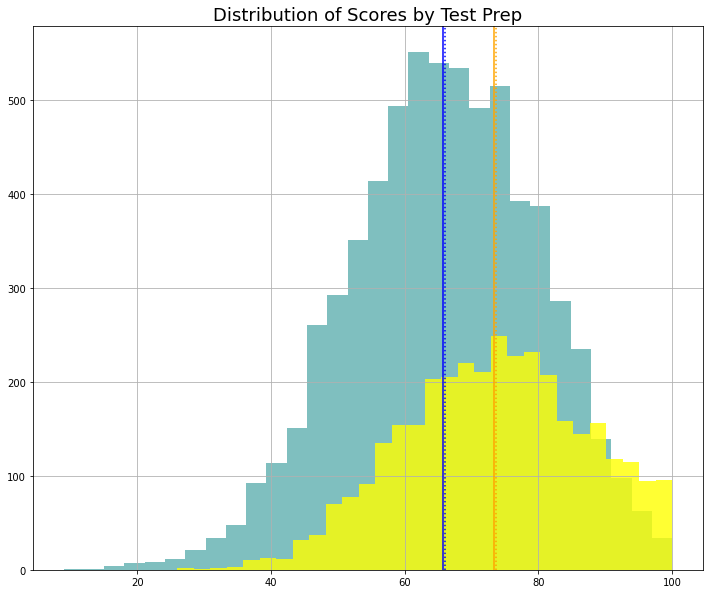

In [37]:
# Compare test prep distribution
prep = df[df['test preparation course'] == 1]             
no_prep = df[df['test preparation course'] == 0]


plt.figure(figsize=(12,10))
hist = no_prep['mean score'].hist(bins=30, color='teal',alpha=0.5)
hist = prep['mean score'].hist(bins=30, color='yellow',alpha=0.8)

plt.title('Distribution of Scores by Test Prep', fontsize=18)
plt.axvline(x=prep['mean score'].mean(), color='orange')
plt.axvline(x=prep['mean score'].median(), linestyle='dotted',color='orange')
plt.axvline(x=no_prep['mean score'].mean(), color='blue')
plt.axvline(x=no_prep['mean score'].median(), linestyle='dotted',color='blue')


print('test prep mean: {}'.format(prep['mean score'].mean()))
print('test prep median: {}'.format(prep['mean score'].median()))
print('test prep standard deviation: {}'.format(prep['mean score'].std()))
print('test prep variance: {}\n'.format(statistics.variance(prep['mean score'])))

print('no test prep mean: {}'.format(no_prep['mean score'].mean()))
print('no test prep median: {}'.format(no_prep['mean score'].median()))
print('no test prep standard deviation: {}'.format(no_prep['mean score'].std()))
print('no test prep variance: {}'.format(statistics.variance(no_prep['mean score'])))

# Two-Sample T-Test
# 5% confidence interval
# Such a test tells us whether two data samples have different means.
# Here, we take the null hypothesis that both groups have equal means.
# We don’t need a known population parameter for this.

results = stats.ttest_ind(a=prep['mean score'],b=no_prep['mean score'],equal_var=False)
print('\nP-value: {}'.format(results[1]))
print('The p-value is less than the 5% confidence interval.')
print('This means we can reject the null hypothesis stating that the two sample means are equal.')

Free Lunch / Orange and Red
free lunch mean: 61.87317351598173
free lunch median: 61.7
free lunch standard deviation: 13.749260881808615
free lunch variance: 189.0421747960326

Standard Lunch / Purple and Blue
standard lunch mean: 71.762453817734
standard lunch median: 72.0
standard lunch standard deviation: 13.45212668944946
standard lunch variance: 180.9597124689985

P-value: 4.2258118293537095e-242
The p-value is less than the 5% confidence interval.
This means we can reject the null hypothesis stating that the two sample means are equal.


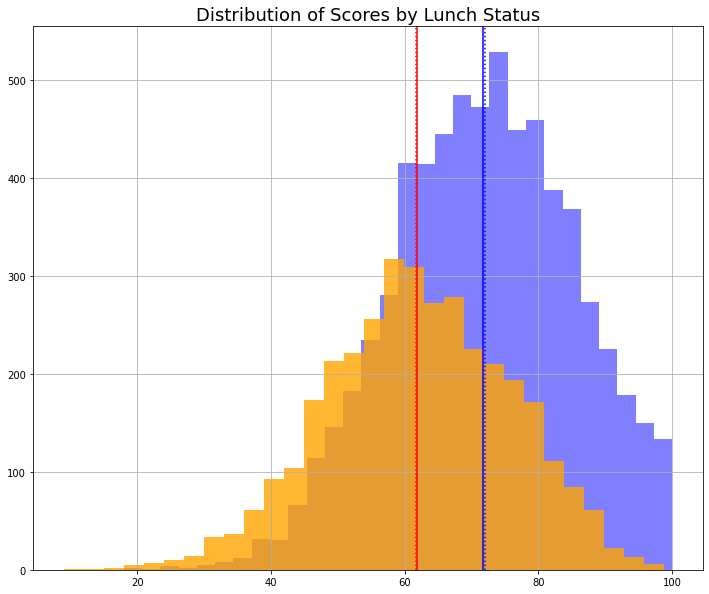

In [38]:
# Compare lunch status distribution without outliers
free = df[df['lunch'] == 'free/reduced']             
standard = df[df['lunch'] == 'standard']


plt.figure(figsize=(12,10))
hist = standard['mean score'].hist(bins=30, color='blue',alpha=0.5)
hist = free['mean score'].hist(bins=30, color='orange',alpha=0.8)

plt.title('Distribution of Scores by Lunch Status', fontsize=18)
plt.axvline(x=free['mean score'].mean(), color='red')
plt.axvline(x=free['mean score'].median(), linestyle='dotted',color='red')
plt.axvline(x=standard['mean score'].mean(), color='blue')
plt.axvline(x=standard['mean score'].median(), linestyle='dotted',color='blue')

print('Free Lunch / Orange and Red')
print('free lunch mean: {}'.format(free['mean score'].mean()))
print('free lunch median: {}'.format(free['mean score'].median()))
print('free lunch standard deviation: {}'.format(free['mean score'].std()))
print('free lunch variance: {}\n'.format(statistics.variance(free['mean score'])))

print('Standard Lunch / Purple and Blue')
print('standard lunch mean: {}'.format(standard['mean score'].mean()))
print('standard lunch median: {}'.format(standard['mean score'].median()))
print('standard lunch standard deviation: {}'.format(standard['mean score'].std()))
print('standard lunch variance: {}'.format(statistics.variance(standard['mean score'])))

# Two-Sample T-Test
# 5% confidence interval
# Such a test tells us whether two data samples have different means.
# Here, we take the null hypothesis that both groups have equal means.
# We don’t need a known population parameter for this.

results = stats.ttest_ind(a=free['mean score'],b=standard['mean score'],equal_var=False)
print('\nP-value: {}'.format(results[1]))
print('The p-value is less than the 5% confidence interval.')
print('This means we can reject the null hypothesis stating that the two sample means are equal.')

Further Education / Orange and Red
further education mean: 70.44329396537778
further education median: 70.7
further education standard deviation: 14.04294012664241
further education variance: 197.20416740046358

High School / Purple and Blue
high school mean: 64.82390678188007
high school median: 65.0
high school standard deviation: 14.17260753810793
high school variance: 200.86280442923373

P-value: 2.0371482986370063e-81
The p-value is less than the 5% confidence interval.
This means we can reject the null hypothesis stating that the two sample means are equal.


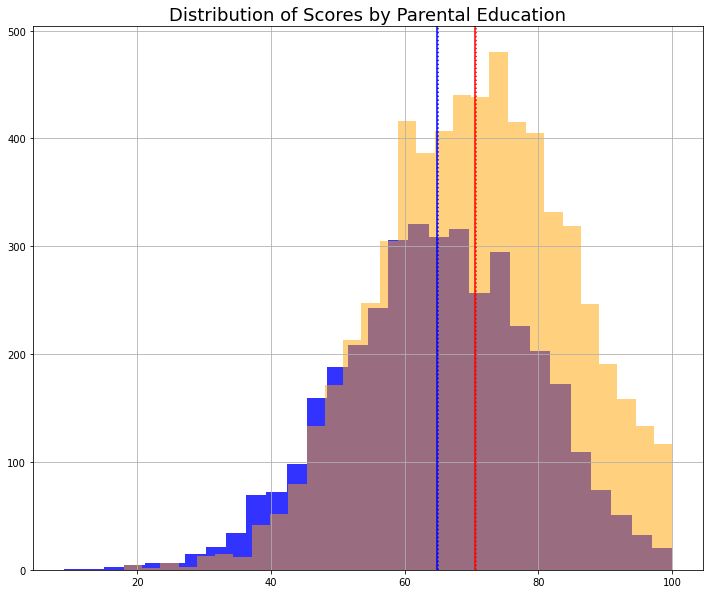

In [39]:
# Compare further education distribution without outliers
further = df[df['education'] == 1]             
high_school = df[df['education'] == 0]


plt.figure(figsize=(12,10))
hist = high_school['mean score'].hist(bins=30, color='blue',alpha=0.8)
hist = further['mean score'].hist(bins=30, color='orange',alpha=0.5)

plt.title('Distribution of Scores by Parental Education', fontsize=18)
plt.axvline(x=further['mean score'].mean(), color='red')
plt.axvline(x=further['mean score'].median(), linestyle='dotted',color='red')
plt.axvline(x=high_school['mean score'].mean(), color='blue')
plt.axvline(x=high_school['mean score'].median(), linestyle='dotted',color='blue')

print('Further Education / Orange and Red')
print('further education mean: {}'.format(further['mean score'].mean()))
print('further education median: {}'.format(further['mean score'].median()))
print('further education standard deviation: {}'.format(further['mean score'].std()))
print('further education variance: {}\n'.format(statistics.variance(further['mean score'])))

print('High School / Purple and Blue')
print('high school mean: {}'.format(high_school['mean score'].mean()))
print('high school median: {}'.format(high_school['mean score'].median()))
print('high school standard deviation: {}'.format(high_school['mean score'].std()))
print('high school variance: {}'.format(statistics.variance(high_school['mean score'])))

# Two-Sample T-Test
# 5% confidence interval
# Such a test tells us whether two data samples have different means.
# Here, we take the null hypothesis that both groups have equal means.
# We don’t need a known population parameter for this.

results = stats.ttest_ind(a=further['mean score'],b=high_school['mean score'],equal_var=False)
print('\nP-value: {}'.format(results[1]))
print('The p-value is less than the 5% confidence interval.')
print('This means we can reject the null hypothesis stating that the two sample means are equal.')

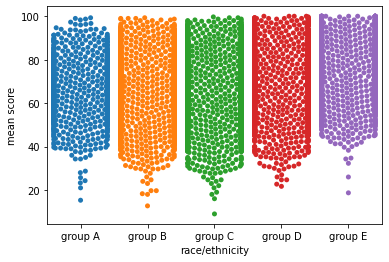

In [40]:
sns.swarmplot(x='race/ethnicity',y='mean score',data=df)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

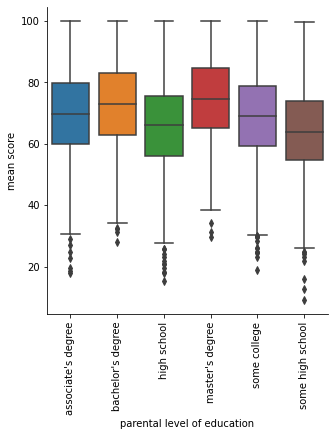

In [41]:
sns.catplot(x='parental level of education',y='mean score',data=df,kind='box')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

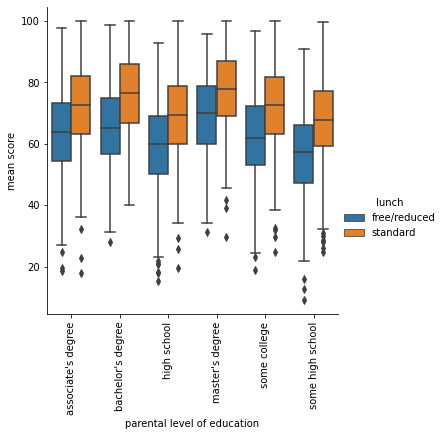

In [42]:
sns.catplot(x='parental level of education',y='mean score',data=df,kind='box',hue='lunch')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

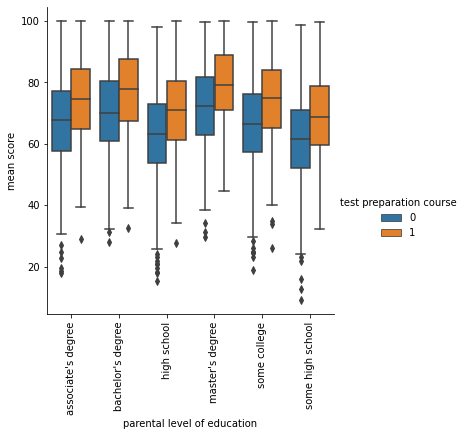

In [43]:
sns.catplot(x='parental level of education',y='mean score',data=df,kind='box', hue='test preparation course')
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

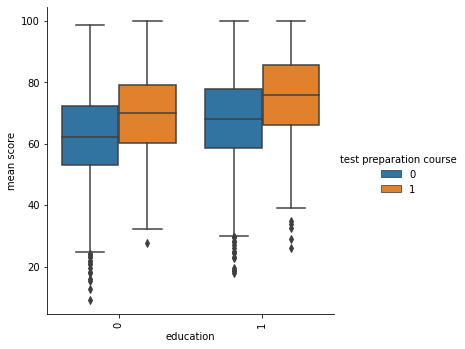

In [44]:
sns.catplot(x='education',y='mean score',data=df,kind='box', hue='test preparation course')
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

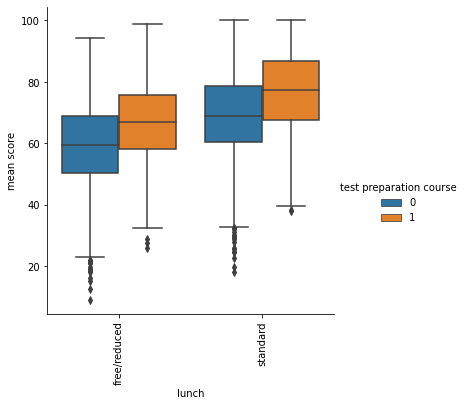

In [45]:
sns.catplot(x='lunch',y='mean score',data=df,kind='box', hue='test preparation course')
plt.xticks(rotation=90)

# Feature Selection and Engineering
**Mean score** has already been created by taking the mean (average) of the three test scores (reading, writing, math).


In [46]:
df.dtypes

gender                         category
race/ethnicity                 category
parental level of education    category
lunch                          category
test preparation course           int64
math score                        int64
reading score                     int64
writing score                     int64
mean score                      float64
education                         int64
dtype: object

In [47]:
# Correlation Matrix
corr_all = df.corr(method='pearson')
corr_all.round(2).style.background_gradient(cmap='coolwarm')

,test preparation course,math score,reading score,writing score,mean score,education
test preparation course,1.000000,0.170000,0.230000,0.310000,0.250000,0.010000
math score,0.170000,1.000000,0.820000,0.810000,0.920000,0.160000
reading score,0.230000,0.820000,1.000000,0.950000,0.970000,0.170000
writing score,0.310000,0.810000,0.950000,1.000000,0.970000,0.210000
mean score,0.250000,0.920000,0.970000,0.970000,1.000000,0.190000
education,0.010000,0.160000,0.170000,0.210000,0.190000,1.000000


It's interesting to see that the test preparation course and parental level of education have a slightly higher correlation with writing scores than with the math score. The level of parental education correlated with total score aligns with a study done by Betty Hart and Todd Risley in the mid-1980's.

According to a study, 'Children in professionals' homes were exposed to an average of more than fifteen hundred more spoken words per hour than children in welfare homes. Over one year, that amounted to a difference of nearly 8 million words, which, by age four, amounted to a total gap of 32 million words. They also found a substantial gap in tone and in the complexity of words being used. As they crunched the numbers, they discovered a direct correlation between the intensity of these early verbal experiences and later achievement.' An article by The Atlantic about this study can be found [here](https://www.theatlantic.com/technology/archive/2010/03/the-32-million-word-gap/36856/).

In [48]:
# Without Outliers
corr_NO = df_NO.corr(method='pearson')
corr_NO.round(2).style.background_gradient(cmap='coolwarm')

,test preparation course,math score,reading score,writing score,mean score
test preparation course,1.000000,0.170000,0.230000,0.310000,0.030000
math score,0.170000,1.000000,0.820000,0.810000,0.090000
reading score,0.230000,0.820000,1.000000,0.950000,0.100000
writing score,0.310000,0.810000,0.950000,1.000000,0.100000
mean score,0.030000,0.090000,0.100000,0.100000,1.000000


We notice that when outliers are dropped, there is a major decrease in correlation between test scores and the mean score. Due to this, we are going to keep outliers in for future analysis.

### Predicted Variable: Grade

In [49]:
'''def set_grade(score):
    if score >= 90:
        return 'A'
    elif score >=80:
        return 'B'
    elif score >=70:
        return 'C'
    elif score >=60:
        return 'D'
    else:
        return 'F'
'''

def set_grade(score):
    if score >= 69.5:
        return 'pass'
    else:
        return 'fail'
df['Grade'] = df['mean score'].apply(set_grade)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score,education,Grade
0,female,group B,bachelor's degree,standard,0,72,72,74,72.7,1,pass
1,female,group C,some college,standard,1,69,90,88,82.3,1,pass
2,female,group B,master's degree,standard,0,90,95,93,92.7,1,pass
3,male,group A,associate's degree,free/reduced,0,47,57,44,49.3,1,fail
4,male,group C,some college,standard,0,76,78,75,76.3,1,pass


### Remove redundant variables
When creating a model in the next couple notebooks, the total score will be the predicted variable. Due to this, all highly correlated (above 95%) features will be removed to ensure appropriate prediction using features unknown prior to the testing.

In [50]:
# Drop score-related variables, keeping total score
df = df.drop(['math score','writing score','reading score'], axis=1)

In [51]:
df.shape

(10000, 8)

## Save total student score data to new csv

In [52]:
df.to_csv(parent+'/data/interim/total_student_scores_without_dummies.csv')